# Capstone Project 2
## Fake news detector with Machine Learning and Deep Learning 
### Problem Statement 
Use various algorithm for fake news detection 

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

### Read the data 

In [3]:
# Read the data
train = pd.read_csv(r"D:\new Data science class\project\capstone 2_dl-NLP-fake news\train.csv")

In [4]:
# Primary data inspection 
train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


### Data fields 
* id: unique id for a news article
* title: the title of a news article
* author: author of the news article
* text: the text of the article; could be incomplete
* label: a label that marks the article as potentially unreliable
    * 1: unreliable
    * 0: reliable

### EDA

In [5]:
#Check the no of rows and no of columns in dataset 
train.shape

(20800, 5)

#### Null check 

In [6]:
# Check for nulls 
train.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

* There are some null values in the dataset

In [7]:
# Drop null values 
train = train.dropna()

In [8]:
# Check wheter nulls have been removed 
train.shape

(18285, 5)

#### Check the distribution of class 

<AxesSubplot:xlabel='label', ylabel='count'>

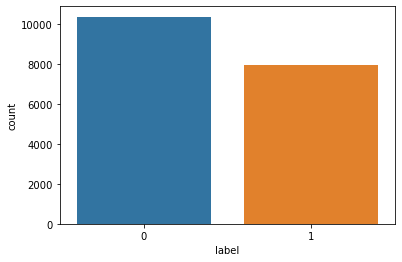

In [9]:
# Check class disribution
sns.countplot(x='label', data = train)

* The class distribution is almost balanced 

#### No of characters present in title and text according to label 

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

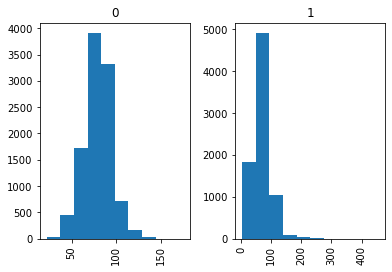

In [9]:
# The number of characters present in each title by labels
train['title'].str.len().hist(by=train['label'])

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

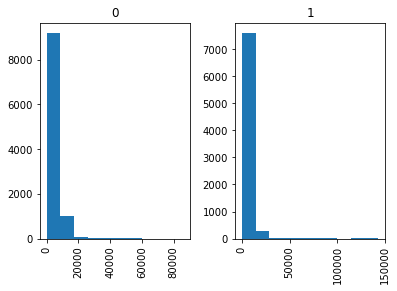

In [10]:
#  the number of characters present in each text by labels
train['text'].str.len().hist(by=train['label'])

*  Insight from above analysis is that new’s title, and text without preprocessing in fake news shorter than in not fake.

### Word frequency without stop words

In [10]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import wordcloud
from wordcloud import WordCloud, STOPWORDS
from collections import defaultdict, Counter
import string
from sklearn.feature_extraction.text import CountVectorizer


In [11]:
# Remove stopwords from title and text by label
messages_fake=train[train.label==1].copy()
messages_real=train[train.label==0].copy()

Text(0.5, 1.0, 'Word frequency for title_fake')

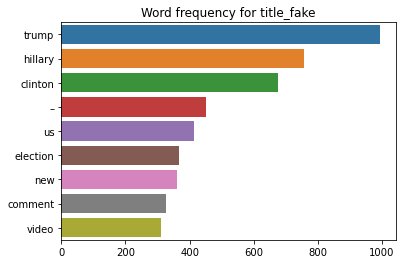

In [13]:
# Corpus analysis 
# corpus_title_fake
stop=set(stopwords.words('english'))
messages_fake['title'] = messages_fake['title'].str.lower()
messages_fake['title'] = messages_fake.title.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
new = messages_fake['title'].str.split()
new=new.values.tolist()
corpus_title_fake=[word for i in new for word in i]

counter=Counter(corpus_title_fake)
most=counter.most_common()
x, y= [], []
for word,count in most[:25]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)
plt.title("Word frequency for title_fake")

Text(0.5, 1.0, 'Word frequency for text_fake')

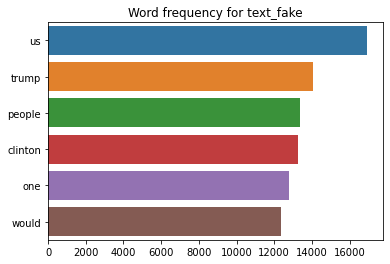

In [14]:
# Corpus analysis corpus_text_fake
stop=set(stopwords.words('english'))
messages_fake['text'] = messages_fake['text'].str.lower()
messages_fake['text'] = messages_fake.text.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
new = messages_fake['text'].str.split()
new=new.values.tolist()
corpus_text_fake=[word for i in new for word in i]

counter=Counter(corpus_text_fake)
most=counter.most_common()
x, y= [], []
for word,count in most[:50]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)
plt.title("Word frequency for text_fake")

Text(0.5, 1.0, 'Word frequency for title_real')

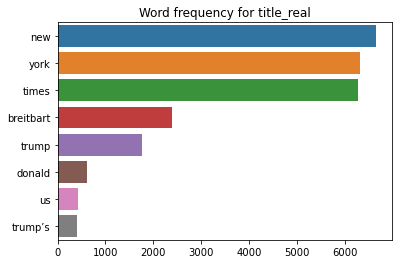

In [15]:
# Corpus analysis corpus_title_real
stop=set(stopwords.words('english'))
messages_real['title'] = messages_real['title'].str.lower()
messages_real['title'] = messages_real.title.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
new = messages_real['title'].str.split()
new=new.values.tolist()
corpus_title_real=[word for i in new for word in i]

counter=Counter(corpus_title_real)
most=counter.most_common()
x, y= [], []
for word,count in most[:25]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)
plt.title("Word frequency for title_real")

Text(0.5, 1.0, 'Word frequency for text_real')

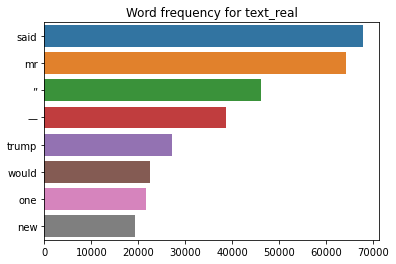

In [16]:
# Corpus analysis corpus_text_real
stop=set(stopwords.words('english'))
messages_real['text'] = messages_real['text'].str.lower()
messages_real['text'] = messages_real.text.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
new = messages_real['text'].str.split()
new=new.values.tolist()
corpus_text_real=[word for i in new for word in i]

counter=Counter(corpus_text_real)
most=counter.most_common()
x, y= [], []
for word,count in most[:50]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)
plt.title("Word frequency for text_real")

* The corpus of title and text of fake and real news is different and the order of the words is also different

### Ngram analysis 

* Ngrams are simply contiguous sequences of n words. 
* Looking at most frequent n-grams can give you a better understanding of the context in which the word was used. 
* To build a representation of our vocabulary we will use **Countvectorizer**. 
* Countvectorizer is a simple method used to tokenize, vectorized, and represent the corpus in an appropriate form.

In [18]:
# Ngram analysis function

def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

Text(0.5, 1.0, 'Ngram analysis for title_fake')

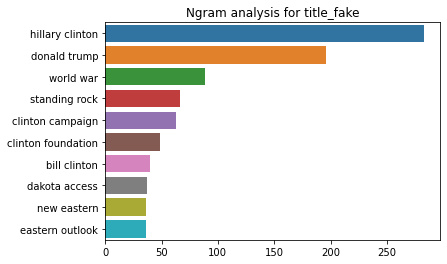

In [20]:
# Ngram analysis corpus_title_fake

messages_fake['title'] = messages_fake['title'].str.lower()
messages_fake['title'] = messages_fake.title.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
messages_fake['title'] = messages_fake['title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

top_n_bigrams=get_top_ngram(messages_fake['title'],2)[:10]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)
plt.title("Ngram analysis for title_fake")

Text(0.5, 1.0, 'Ngram analysis for text_fake')

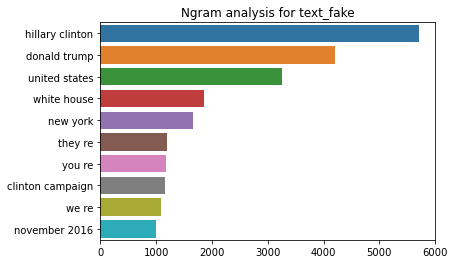

In [21]:
# Ngram analysis corpus_text_fake

messages_fake['text'] = messages_fake['text'].str.lower()
messages_fake['text'] = messages_fake.text.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
messages_fake['text'] = messages_fake['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

top_n_bigrams=get_top_ngram(messages_fake['text'],2)[:10]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)
plt.title("Ngram analysis for text_fake")

Text(0.5, 1.0, 'Ngram analysis for title_real')

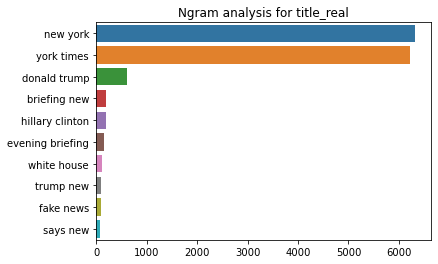

In [22]:
# Ngram analysis corpus_title_real

messages_real['title'] = messages_real['title'].str.lower()
messages_real['title'] = messages_real.title.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
messages_real['title'] = messages_real['title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

top_n_bigrams=get_top_ngram(messages_real['title'],2)[:10]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)
plt.title("Ngram analysis for title_real")

Text(0.5, 1.0, 'Ngram analysis for text_real')

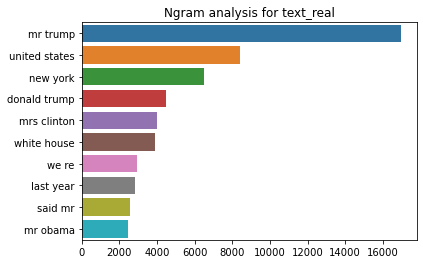

In [23]:
# Ngram analysis corpus_text_real

messages_real['text'] = messages_real['text'].str.lower()
messages_real['text'] = messages_real.text.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
messages_real['text'] = messages_real['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

top_n_bigrams=get_top_ngram(messages_real['text'],2)[:10]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)
plt.title("Ngram analysis for text_real")

### Wordcloud 
* Wordcloud is a great way to represent text data. 
* The size and color of each word that appears in the Word cloud indicate it’s frequency or importance

In [24]:
# Function for word cloud
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)
   
    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

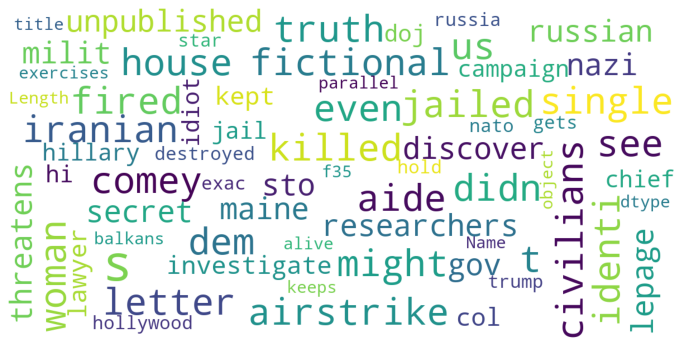

In [25]:
# Word cloud for corpus_title_fake
show_wordcloud(messages_fake['title'])

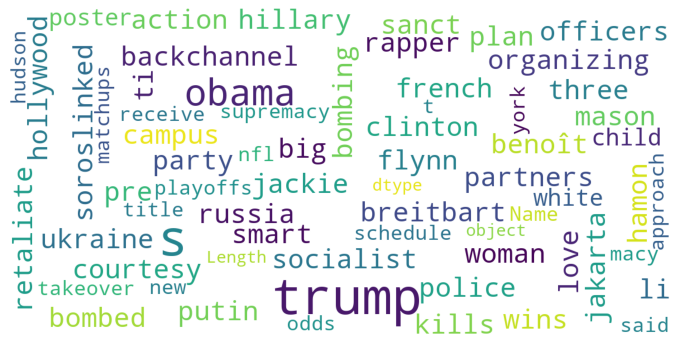

In [26]:
# Word cloud for corpus_title_real
show_wordcloud(messages_real['title'])

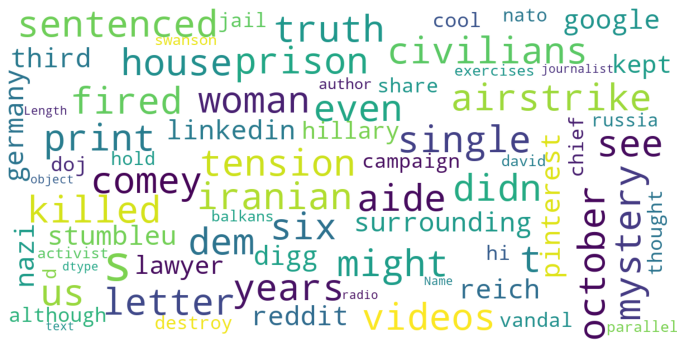

In [27]:
# Word cloud for corpus_text_fake
show_wordcloud(messages_fake['text'])

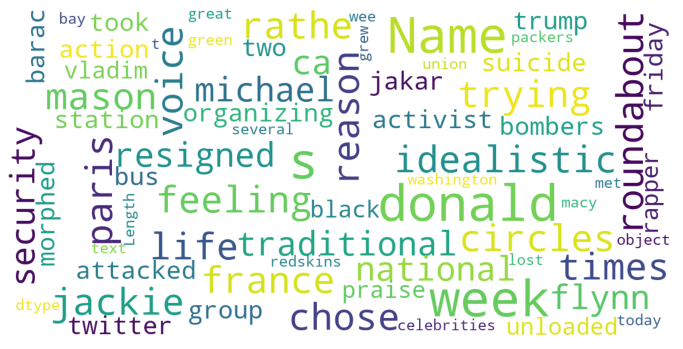

In [28]:
# Word cloud for corpus_text_real
show_wordcloud(messages_real['text'])

### Pre Processing of data 

In [4]:
# Get the Dependent feature

X_train=train.drop('label',axis=1)
y_train=train['label']

In [5]:
# Since we drop Null values from our Dataset ,so we need to Reset Index of our Dataset

messages = X_train.copy()
messages.reset_index(inplace=True)

In [8]:
messages["title"][0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'

In [9]:
# Importing libraries for pre processing 
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [10]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nikaj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### Steps to obtain clean title

* Step 1 -- re.sub -- Consider only alphabets and removing the numbers, special characters
* Step 2 -- review.lower() -- Converting all the words to lower case
* Step 3 -- review.split() -- Convert the whole text into a list of words, so that the stop words can be applied to them later
* Step 4 -- ps.stem() -- Stemming 
    * Stemming - Stemming is the process of producing morphological variants of a root/base word.  A stemming algorithm reduces the words “chocolates”, “chocolatey”, “choco” to the root word, “chocolate” 
* Step 5 -- stopwords.words('english') -- Removing stopwords 
    * Stopwords - Words like a, the , is , then etc are redundant and doesn't play any role in nlp, so it's better to remove these type of words. And stop words is the way to do that.
* Step 6 -- ' '.join() -- joining them again

In [11]:
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [12]:
corpus[0]

'hous dem aid even see comey letter jason chaffetz tweet'

### One-hot Encoding
Words must be one-hot encoded, This is done to obtain numerical feature matrix

In [13]:
from keras.preprocessing.text import one_hot

In [14]:
voc_size = 5000
onehot_rep = [one_hot(words, voc_size) for words in corpus]
onehot_rep[0]

[1063, 2714, 1409, 2326, 1505, 1043, 456, 2246, 3721, 326]

### Text Padding
* Model require to have inputs with the same shape and size. And not all the sentences have the same length. 
* So we need to do padding.
* Padding is done by adding zeros for short sentences(pre or post the sentence) and truncating the sentences which exceed the max number of words which is declared by "maxlen".

In [15]:
from keras.preprocessing.sequence import pad_sequences

In [16]:
sent_length = 20
embeded_docs = pad_sequences(onehot_rep,padding= 'pre',maxlen = sent_length)
embeded_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 1063,
       2714, 1409, 2326, 1505, 1043,  456, 2246, 3721,  326])

In [22]:
# check shape 
len(embeded_docs),y_train.shape

(18285, (18285,))

In [17]:
# final train data 
X_final=np.array(embeded_docs)
y_final=np.array(y_train)
X_final.shape,y_final.shape

((18285, 20), (18285,))

### Train test split 

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.25, random_state=42)

### Modeling 

#### 1. Naive Bayes 
The Naive Bayes Classifier is a deterministic algorithm that uses the Bayes theorem to classify data.
<img src="https://miro.medium.com/max/443/1*dmMy7qdXiWakpUP_YzkBDQ.png" width="300" height="300">
This theorem uses past data to make better decisions.

There are three types of Naive Bayes model under the scikit-learn library:

**Gaussian:** It is used in classification and it assumes that features follow a normal distribution.

**Multinomial:** It is used for discrete counts. For example, let’s say,  we have a text classification problem. Here we can consider Bernoulli trials which is one step further and instead of “word occurring in the document”, we have “count how often word occurs in the document”, you can think of it as “number of times outcome number x_i is observed over the n trials”.

**Bernoulli:** The binomial model is useful if your feature vectors are binary (i.e. zeros and ones). One application would be text classification with ‘bag of words’ model where the 1s & 0s are “word occurs in the document” and “word does not occur in the document” respectively.

In [19]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,accuracy_score

In [26]:
model1 = MultinomialNB()
model1.fit(x_train,y_train)
pred1 = model1.predict(x_test)
cr1    = classification_report(y_test,pred1)
print(cr1)

              precision    recall  f1-score   support

           0       0.73      0.69      0.71      2600
           1       0.62      0.67      0.64      1972

    accuracy                           0.68      4572
   macro avg       0.68      0.68      0.68      4572
weighted avg       0.68      0.68      0.68      4572



#### 2. Linear SVM 
Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning.

The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.

SVM chooses the extreme points/vectors that help in creating the hyperplane. These extreme cases are called as support vectors, and hence algorithm is termed as Support Vector Machine. Consider the below diagram in which there are two different categories that are classified using a decision boundary or hyperplane:
<img src= "https://static.javatpoint.com/tutorial/machine-learning/images/support-vector-machine-algorithm.png" width = 300>

SVM algorithm can be used for Face detection, image classification, text categorization, etc.

**Types of SVM**

**Linear SVM:** Linear SVM is used for linearly separable data, which means if a dataset can be classified into two classes by using a single straight line, then such data is termed as linearly separable data, and classifier is used called as Linear SVM classifier.

**Non-linear SVM:** Non-Linear SVM is used for non-linearly separated data, which means if a dataset cannot be classified by using a straight line, then such data is termed as non-linear data and classifier used is called as Non-linear SVM classifier.

In [27]:
from sklearn.svm import LinearSVC

In [28]:
model2 = LinearSVC(class_weight = 'balanced',max_iter=5000)
model2.fit(x_train,y_train)
pred2 = model2.predict(x_test)
cr2    = classification_report(y_test,pred2)
print(cr2)

              precision    recall  f1-score   support

           0       0.74      0.74      0.74      2600
           1       0.66      0.66      0.66      1972

    accuracy                           0.70      4572
   macro avg       0.70      0.70      0.70      4572
weighted avg       0.70      0.70      0.70      4572



#### 3. KNN
K-Nearest Neighbours is one of the most basic yet essential classification algorithms in Machine Learning. It belongs to the supervised learning domain and finds intense application in pattern recognition, data mining and intrusion detection.

It is widely disposable in real-life scenarios since it is non-parametric, meaning, it does not make any underlying assumptions about the distribution of data 

In [29]:
from sklearn import neighbors
from sklearn.model_selection import cross_val_score

In [30]:
# cross validation for best k 
cv_accuracy=[]
n_list = np.arange(3,12,2)

for n in n_list:
    model = neighbors.KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    score = cross_val_score(model,x_train,y_train, cv= 10, scoring = 'accuracy')
    cv_accuracy.append(score.mean())

Text(0, 0.5, 'accuracy')

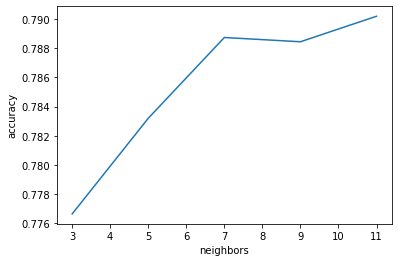

In [31]:
# plot cv_accuracy and n_list
plt.plot(n_list, cv_accuracy)
plt.xlabel('neighbors')
plt.ylabel('accuracy')

In [32]:
bestK = 7

In [33]:
model3 = neighbors.KNeighborsClassifier(n_neighbors=bestK)
model3.fit(x_train,y_train)
pred3 = model3.predict(x_test)
cr3    = classification_report(y_test,pred3)
print(cr3)

              precision    recall  f1-score   support

           0       0.79      0.83      0.81      2600
           1       0.76      0.72      0.74      1972

    accuracy                           0.78      4572
   macro avg       0.78      0.77      0.77      4572
weighted avg       0.78      0.78      0.78      4572



### LSTM Model 1

In [21]:
import tensorflow
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential

**Layer1 - Embedding layer** 

* Keras offers an Embedding layer that can be used for neural networks on text data.
* It requires that the input data be integer encoded so that each word is represented by a unique integer. 
* The Embedding layer is initialized with random weights and will learn an embedding for all of the words in the training dataset.

**Layer2 - LSTM**

* It uses sequential information.
* It has a memory that captures what has been calculated so far.

We try to solve the binary classification problem, so:
* We input each word, words relate to each other in some ways.
* We make predictions at the end of the title/text when we see all the words in that article.
* RNNs, bypassing input from last output, are able to retain information, and able to leverage all information at the end to make predictions.

**Layer3 - Dense**

* The output of my network is the Dense layer with 1 output sigmoid activation function for binary classification. 

> To compile my model I used binary_crossentropy as loss function and accuracy metrics.For optimizer, I used Adam.

In [35]:
# model build 
embedding_vector_feature = 10

#creating model using LSTM
model=Sequential()

#taking number features as voc_size
model.add(Embedding(voc_size,embedding_vector_feature,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))

#compiling the model 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 10)            50000     
_________________________________________________________________
lstm (LSTM)                  (None, 100)               44400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 94,501
Trainable params: 94,501
Non-trainable params: 0
_________________________________________________________________
None


In [36]:
# train model
history = model.fit(x_train,y_train, validation_split=0.2, epochs=10, batch_size=64)

Epoch 1/10
172/172 [==============================] - 6s 35ms/step - loss: 0.4432 - accuracy: 0.7792 - val_loss: 0.2395 - val_accuracy: 0.9012
Epoch 2/10
172/172 [==============================] - 4s 23ms/step - loss: 0.1789 - accuracy: 0.9300 - val_loss: 0.1947 - val_accuracy: 0.9213
Epoch 3/10
172/172 [==============================] - 4s 22ms/step - loss: 0.1168 - accuracy: 0.9569 - val_loss: 0.1882 - val_accuracy: 0.9238
Epoch 4/10
172/172 [==============================] - 4s 22ms/step - loss: 0.0846 - accuracy: 0.9692 - val_loss: 0.2299 - val_accuracy: 0.9067
Epoch 5/10
172/172 [==============================] - 4s 24ms/step - loss: 0.0626 - accuracy: 0.9788 - val_loss: 0.2239 - val_accuracy: 0.9154
Epoch 6/10
172/172 [==============================] - 4s 24ms/step - loss: 0.0542 - accuracy: 0.9825 - val_loss: 0.2599 - val_accuracy: 0.9205
Epoch 7/10
172/172 [==============================] - 4s 24ms/step - loss: 0.0417 - accuracy: 0.9865 - val_loss: 0.2606 - val_accuracy: 0.9172

In [39]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

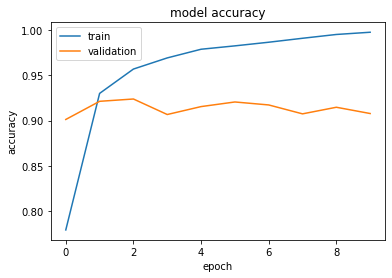

In [40]:
# summarize history for accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

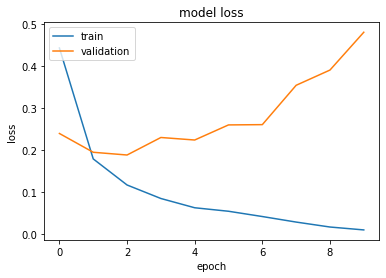

In [41]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

* We can see that above model is overfitting 

In [43]:
# Prediction on test data 
pred4 = model.predict_classes(x_test)
cr4 = classification_report(y_test,pred4)
print(cr4)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      2600
           1       0.89      0.87      0.88      1972

    accuracy                           0.90      4572
   macro avg       0.90      0.90      0.90      4572
weighted avg       0.90      0.90      0.90      4572



### LSTM - model2 - adding dropout layer 
Added Dropout to avoid model overfitting.

In [25]:
embedding_vector_feature = 10

#creating model using LSTM
model_lstm_2 = Sequential()

#taking number features as 50
model_lstm_2.add(Embedding(voc_size,embedding_vector_feature,input_length=sent_length))
model_lstm_2.add(Dropout(0.5))

#adding LSTM layers with 100 neurons
model_lstm_2.add(LSTM(100))
model_lstm_2.add(Dropout(0.3))

#adding output layer 
model_lstm_2.add(Dense(1,activation="sigmoid"))

#compiling the model
model_lstm_2.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

print(model_lstm_2.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 10)            50000     
_________________________________________________________________
dropout (Dropout)            (None, 20, 10)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               44400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 94,501
Trainable params: 94,501
Non-trainable params: 0
_________________________________________________________________
None


In [76]:
# train model
history_lstm_2 = model_lstm_2.fit(x_train,y_train, validation_split=0.2, epochs=10, batch_size=64)

Epoch 1/10
172/172 [==============================] - 3s 18ms/step - loss: 0.4578 - accuracy: 0.7583 - val_loss: 0.2284 - val_accuracy: 0.9027
Epoch 2/10
172/172 [==============================] - 2s 13ms/step - loss: 0.2058 - accuracy: 0.9180 - val_loss: 0.1876 - val_accuracy: 0.9205
Epoch 3/10
172/172 [==============================] - 2s 13ms/step - loss: 0.1536 - accuracy: 0.9387 - val_loss: 0.1837 - val_accuracy: 0.9223
Epoch 4/10
172/172 [==============================] - 2s 13ms/step - loss: 0.1240 - accuracy: 0.9522 - val_loss: 0.1833 - val_accuracy: 0.9249
Epoch 5/10
172/172 [==============================] - 2s 13ms/step - loss: 0.1073 - accuracy: 0.9604 - val_loss: 0.1896 - val_accuracy: 0.9234
Epoch 6/10
172/172 [==============================] - 3s 15ms/step - loss: 0.0986 - accuracy: 0.9634 - val_loss: 0.2051 - val_accuracy: 0.9275
Epoch 7/10
172/172 [==============================] - 2s 14ms/step - loss: 0.0884 - accuracy: 0.9676 - val_loss: 0.2183 - val_accuracy: 0.9249

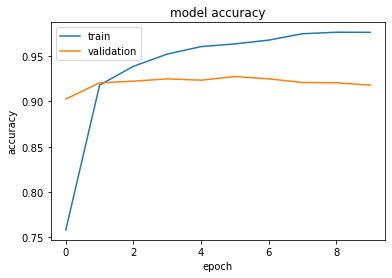

In [77]:
# summarize history for accuracy

plt.plot(history_lstm_2.history['accuracy'])
plt.plot(history_lstm_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

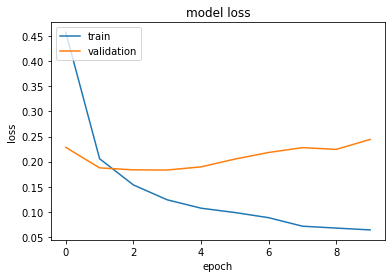

In [78]:
# summarize history for loss
plt.plot(history_lstm_2.history['loss'])
plt.plot(history_lstm_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [79]:
# Prediction on test data 
pred5 = model_lstm_2.predict_classes(x_test)
cr5 = classification_report(y_test,pred5)
print(cr5)

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      2600
           1       0.88      0.90      0.89      1972

    accuracy                           0.91      4572
   macro avg       0.90      0.91      0.91      4572
weighted avg       0.91      0.91      0.91      4572



### LSTM model 3 - adding a cnn layer 

In [24]:
from tensorflow.keras.layers import Input,GlobalMaxPool1D,Dropout

I added GlobalMaxPool1D to downsamples the input representation and Dense layers to generate more features, Dropout to avoid model overfitting.

**How GlobalMaxPool1D works:**

* Downsamples the input representation by taking the maximum value over the time dimension.
* Global max pooling = ordinary max pooling layer with pool size equals to the size of the input (minus filter size + 1, to be precise).
* Global pooling layers can be used in a variety of cases. 
* Primarily, it can be used to reduce the dimensionality of the feature maps output by some convolutional layer, to replace Flattening and sometimes even Dense layers in your classifier. 

In [80]:
# model 3 build 

#creating model using LSTM
model_lstm_3 = Sequential()

#taking number features as voc_size
model_lstm_3.add(Embedding(voc_size,embedding_vector_feature,input_length=sent_length))

#adding LSTM layers with 100 neurons
model_lstm_3.add(LSTM(100, return_sequences=True,name='lstm_layer'))
model_lstm_3.add(Dropout(0.1))

# adding cnn layer
model_lstm_3.add(GlobalMaxPool1D())
model_lstm_3.add(Dropout(0.1))

#adding another dense layer 
model_lstm_3.add(Dense(50, activation='relu'))
model_lstm_3.add(Dropout(0.1))

#adding output layer
model_lstm_3.add(Dense(1,activation='sigmoid'))

# compiling the model 
model_lstm_3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_lstm_3.summary())


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 20, 10)            50000     
_________________________________________________________________
lstm_layer (LSTM)            (None, 20, 100)           44400     
_________________________________________________________________
dropout_14 (Dropout)         (None, 20, 100)           0         
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 100)               0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 50)                5050      
_________________________________________________________________
dropout_16 (Dropout)         (None, 50)              

In [81]:
# train model
history_lstm_3 = model_lstm_3.fit(x_train,y_train, validation_split=0.2, epochs=10, batch_size=64)

Epoch 1/10
172/172 [==============================] - 3s 19ms/step - loss: 0.4347 - accuracy: 0.7694 - val_loss: 0.2077 - val_accuracy: 0.9118
Epoch 2/10
172/172 [==============================] - 2s 14ms/step - loss: 0.1690 - accuracy: 0.9356 - val_loss: 0.1997 - val_accuracy: 0.9140
Epoch 3/10
172/172 [==============================] - 2s 14ms/step - loss: 0.1214 - accuracy: 0.9552 - val_loss: 0.2029 - val_accuracy: 0.9227
Epoch 4/10
172/172 [==============================] - 2s 14ms/step - loss: 0.0881 - accuracy: 0.9703 - val_loss: 0.2094 - val_accuracy: 0.9209
Epoch 5/10
172/172 [==============================] - 2s 14ms/step - loss: 0.0620 - accuracy: 0.9811 - val_loss: 0.2691 - val_accuracy: 0.9063
Epoch 6/10
172/172 [==============================] - 3s 16ms/step - loss: 0.0465 - accuracy: 0.9867 - val_loss: 0.2776 - val_accuracy: 0.9162
Epoch 7/10
172/172 [==============================] - 3s 15ms/step - loss: 0.0336 - accuracy: 0.9907 - val_loss: 0.3229 - val_accuracy: 0.9096

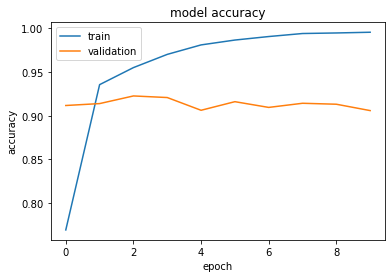

In [82]:
# summarize history for accuracy

plt.plot(history_lstm_3.history['accuracy'])
plt.plot(history_lstm_3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

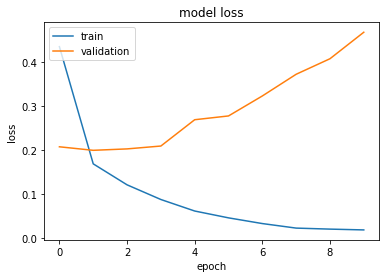

In [83]:
# summarize history for loss
plt.plot(history_lstm_3.history['loss'])
plt.plot(history_lstm_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [84]:
# Prediction on test data 
pred6 = model_lstm_3.predict_classes(x_test)
cr6 = classification_report(y_test,pred6)
print(cr6)

              precision    recall  f1-score   support

           0       0.91      0.92      0.91      2600
           1       0.89      0.88      0.88      1972

    accuracy                           0.90      4572
   macro avg       0.90      0.90      0.90      4572
weighted avg       0.90      0.90      0.90      4572



### Evaluation of title models 
Tabulating the accuracy for all algorithms 


In [87]:
score_1 = accuracy_score(y_test,pred1)
score_2 = accuracy_score(y_test,pred2)
score_3 = accuracy_score(y_test,pred3)
score_4 = accuracy_score(y_test,pred4)
score_5 = accuracy_score(y_test,pred5)
score_6 = accuracy_score(y_test,pred6)

results = pd.DataFrame([["Naive Bayes",score_1],["Linear SVM",score_2],["KNN",score_3],
                       ["LSTM-1",score_4],["LSTM - with dropout layer",score_5],["LSTM - with CNN",score_6]],columns =["Model","Accuracy"])
results

,Model,Accuracy
0,Naive Bayes,0.680884
1,Linear SVM,0.704724
2,KNN,0.780402
3,LSTM-1,0.898731
4,LSTM - with dropout layer,0.906605
5,LSTM - with CNN,0.898513


### Conclusion 
* we can see that deep learning models perform better than ML models  
* we can see that LSTM - with dropout layer gives highest accuracy score   